In [12]:
import time
from pathlib import Path
import glob
import os
import numpy as np
from tqdm import tqdm
import itertools
import csv
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import IPython.display as ipd
from IPython.display import clear_output

In [2]:
def plot_spec(filepath):
    samplingFrequency, signalData = wavfile.read(filepath)
    
    # Plot the signal read from wav file
    plt.subplot(211)

    plt.title('Spectrogram of a wav file')

    plt.plot(signalData)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(212)
    plt.specgram(signalData,Fs=samplingFrequency,NFFT=512)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    
    plt.show()

In [3]:
folder = glob.glob('dataset/wavs/*')

Check all dataset

In [99]:
nfiles = [len(os.listdir(x)) for x in glob.glob(f'dataset/wavs/*')]
start_id = 377

for index in range(start_id, 400):
    audio_in_folder = [str(Path(x)) for x in glob.glob(f'dataset/wavs/{folder[index]}/*.wav')]
    print(folder[index], 'id:', index, 'count:', sum(nfiles[:index]))
    for i, f in enumerate(audio_in_folder):
        path  = str(Path(f))
        print(f"[{i + 1}/{len(audio_in_folder)}] {path}")

        audio = ipd.Audio(path, autoplay=True) 
        ipd.display(audio)

        duration = librosa.get_duration(filename=path)
        time.sleep(duration + 0.5)
    time.sleep(1.0)
    clear_output(wait=True)

dataset/wavs/99-F-40 id: 399 count: 10491


Check each folder

In [154]:
audio_in_folder = glob.glob(f'dataset/wavs/734-M-41/*.wav')
for i, f in enumerate(audio_in_folder):
    path  = str(Path(f))
    print(f"[{i + 1}/{len(audio_in_folder)}] {path}", end=' ')
    
    audio = ipd.Audio(path, autoplay=True) 
    ipd.display(audio)
    
    duration = librosa.get_duration(filename=path)
#     print(duration, end='\n\n')
    time.sleep(duration + 0.5)

[1/23] dataset/wavs/719-F-29/719-10.wav 3.143375

[2/23] dataset/wavs/719-F-29/719-11.wav 1.6465

[3/23] dataset/wavs/719-F-29/719-12.wav 10.29825

[4/23] dataset/wavs/719-F-29/719-13.wav 7.753625

[5/23] dataset/wavs/719-F-29/719-14.wav 6.5860625

[6/23] dataset/wavs/719-F-29/719-15.wav 10.2683125

[7/23] dataset/wavs/719-F-29/719-16.wav 1.3471875

[8/23] dataset/wavs/719-F-29/719-17.wav 1.3471875

[9/23] dataset/wavs/719-F-29/719-18.wav 3.5325625

[10/23] dataset/wavs/719-F-29/719-19.wav 6.226875

[11/23] dataset/wavs/719-F-29/719-2.wav 5.1790625

[12/23] dataset/wavs/719-F-29/719-20.wav 11.1365

[13/23] dataset/wavs/719-F-29/719-3.wav 4.9994375

[14/23] dataset/wavs/719-F-29/719-4.wav 6.4065

[15/23] dataset/wavs/719-F-29/719-5.wav 6.7656875

[16/23] dataset/wavs/719-F-29/719-6.wav 2.544625

[17/23] dataset/wavs/719-F-29/719-7.wav 2.844

[18/23] dataset/wavs/719-F-29/719-8.wav 4.8796875

[19/23] dataset/wavs/719-F-29/719-9.wav 3.1733125

[20/23] dataset/wavs/719-F-29/719.wav 4.10137

Check each files

In [ ]:
path = f"dataset/wavs/719-F-29/719-20.wav"
plot_spec(path)
ipd.Audio(path, autoplay=True)

check folder and print name file path with theirduration

In [236]:
audio_in_folder = glob.glob(f'dataset/wavs/424-M-28/*.wav')
# dump = []
for i, f in enumerate(audio_in_folder):
    path  = str(Path(f))
    print(f"[{i + 1}/{len(audio_in_folder)}] {path}", end=' ')
    duration = librosa.get_duration(filename=path)
    print(duration, end='\n\n')

[1/54] dataset/wavs/424-M-28/424-11.wav 1.9189375

[2/54] dataset/wavs/424-M-28/424-12.wav 0.7689375

[3/54] dataset/wavs/424-M-28/424-14.wav 1.8924375

[4/54] dataset/wavs/424-M-28/424-15.wav 2.5155

[5/54] dataset/wavs/424-M-28/424-16.wav 0.73575

[6/54] dataset/wavs/424-M-28/424-17.wav 3.6456875

[7/54] dataset/wavs/424-M-28/424-18.wav 3.088875

[8/54] dataset/wavs/424-M-28/424-19.wav 2.611625

[9/54] dataset/wavs/424-M-28/424-2.wav 0.881625

[10/54] dataset/wavs/424-M-28/424-20.wav 4.2953125

[11/54] dataset/wavs/424-M-28/424-21.wav 1.3256875

[12/54] dataset/wavs/424-M-28/424-22.wav 1.86925

[13/54] dataset/wavs/424-M-28/424-23.wav 1.3655

[14/54] dataset/wavs/424-M-28/424-25.wav 2.094625

[15/54] dataset/wavs/424-M-28/424-29.wav 2.3000625

[16/54] dataset/wavs/424-M-28/424-3.wav 4.570375

[17/54] dataset/wavs/424-M-28/424-30.wav 3.3474375

[18/54] dataset/wavs/424-M-28/424-31.wav 5.4420625

[19/54] dataset/wavs/424-M-28/424-32.wav 2.1808125

[20/54] dataset/wavs/424-M-28/424-33.w

Perform vad on long file(>10s of duration)

In [211]:
from utils import *
path = f"dataset/wavs/726-M-34/726-9.wav"
write = True
segments = VAD(win_length=200).detect(path, write=write, show=False)
print(len(segments))

0


## Delete noise

Get n-thresh files which have shortest length and put to dump to remove later, n is number of files in folder, thresh take 35

In [362]:
audio_in_folder = glob.glob(f'dataset/wavs/438-M-40/*.wav')
gap = 12

dump = {}
print(len(audio_in_folder))
for i, f in enumerate(audio_in_folder):
    path  = str(Path(f))
    duration = librosa.get_duration(filename=path)
    dump[path] = duration
dump = {k: v for k, v in sorted(dump.items(), key=lambda item: item[1])}

list(dump.keys())[:gap]

47


['dataset/wavs/438-M-40/438-24.wav',
 'dataset/wavs/438-M-40/438-25.wav',
 'dataset/wavs/438-M-40/438-19.wav',
 'dataset/wavs/438-M-40/438-35.wav',
 'dataset/wavs/438-M-40/438-23.wav',
 'dataset/wavs/438-M-40/438-21.wav',
 'dataset/wavs/438-M-40/438-39.wav',
 'dataset/wavs/438-M-40/438-20.wav',
 'dataset/wavs/438-M-40/438-34.wav',
 'dataset/wavs/438-M-40/438-26.wav',
 'dataset/wavs/438-M-40/438-47.wav',
 'dataset/wavs/438-M-40/438-42.wav']

In [364]:
delete_files = list(dump.keys())[:gap]
for f in tqdm(delete_files):
#     path = os.path.join('dataset/wavs/' , f)
    if os.path.exists(f):
        print("delete", f)
        os.remove(f)

100%|██████████| 12/12 [00:00<00:00, 14803.43it/s]


## Plot graphs

In [366]:
origin = "dataset/wavs/"
filenames = glob.glob(f"{origin}/*")
# filenames

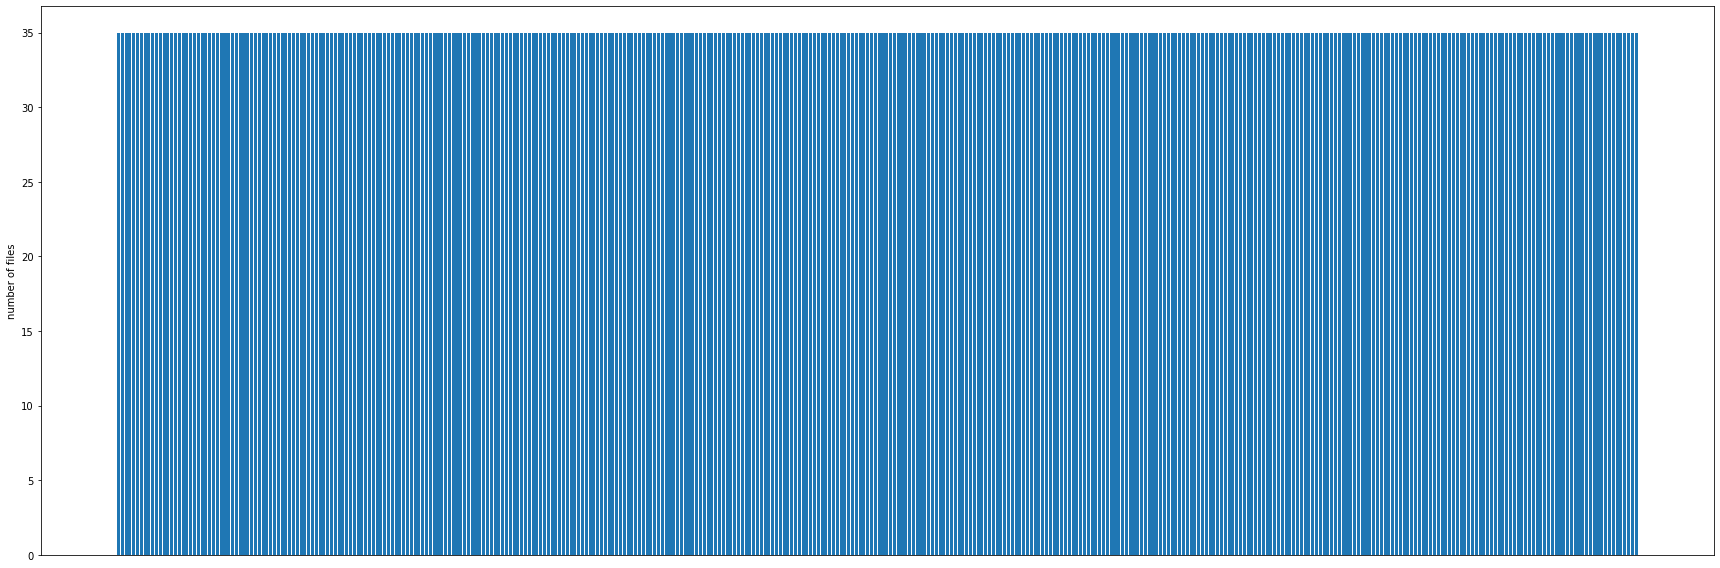

In [367]:
# so luong files moi nguoi
no_of_files = []
for f in filenames:
    if len(os.listdir(f)) == 0:
        print(f)
    no_of_files.append(len(os.listdir(f)))
plt.figure(figsize=(24, 8))
plt.bar(filenames, no_of_files), plt.ylabel('number of files'), plt.xticks([])
plt.tight_layout()

In [368]:
np.mean(no_of_files), filenames[np.argmax(no_of_files)], filenames[np.argmin(no_of_files)], sum(no_of_files), max(no_of_files), min(no_of_files)

(35.0, 'dataset/wavs/272-M-26', 'dataset/wavs/272-M-26', 14000, 35, 35)

In [369]:
vad_list = []
vad_list = list(filter(lambda x: len(os.listdir(x)) < 0.9 * np.mean(no_of_files), filenames))
len(vad_list)

0

100%|██████████| 400/400 [00:02<00:00, 172.67it/s]


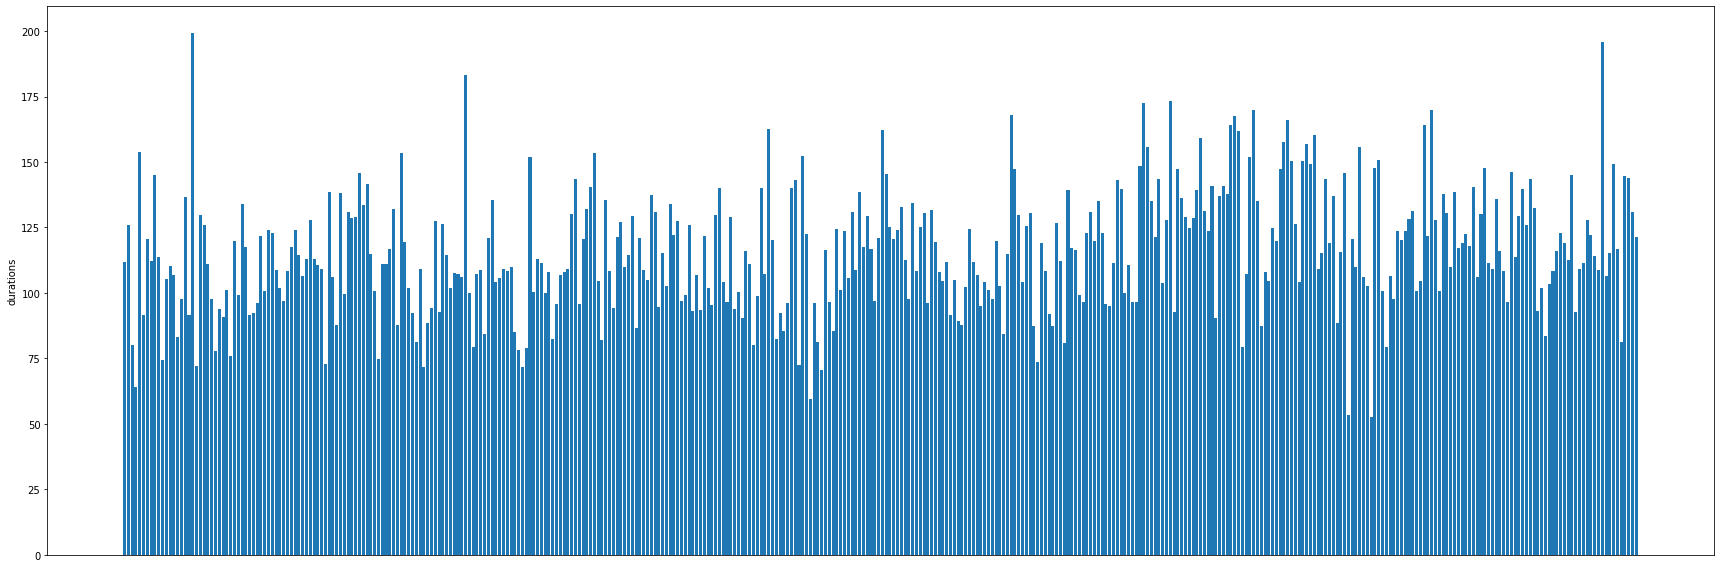

In [370]:
# thoi gian audio cua moi nguoi
import wave
import librosa
import contextlib

def get_duration(fn):
    length = 0
    for audio in os.listdir(fn):
        with contextlib.closing(wave.open(os.path.join(fn, audio),'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration_each = frames / float(rate)
        length += duration_each
    return length
    

durations = []
for fn in tqdm(filenames):
    length = get_duration(fn)
    durations.append(length)
plt.figure(figsize=(24, 8))
plt.bar(filenames, durations), plt.ylabel('durations'), plt.xticks([]), plt.tight_layout()
plt.show()

In [371]:
np.mean(durations), np.argmax(durations), sum(durations), max(durations), min(durations)

(115.79967468749999,
 18,
 46319.86987500003,
 199.45956249999975,
 52.617312500000004)

In [372]:
vad_list2 = []
vad_list2 = list(filter(lambda x: get_duration(x) < 0.75 * np.mean(durations), filenames))

vad_list += vad_list2
vad_list = list(set(vad_list))
len(vad_list)

37

In [130]:
# vad for vad list
from utils import *
def vad_on_vad_list(vad_list):
    vad_engine = VAD(frame_duration=30, win_length=180)

    data_paths = []
    for fdir in tqdm(vad_list):
        data_paths.extend(
            glob.glob(f'{fdir}/*.wav'))

    # filters audiopaths
    raw_paths = list(
        filter(lambda x: 'augment' not in str(x) and 'vad' not in str(x), data_paths))

    for audio_path in tqdm(raw_paths, desc="Vad performing"):
        vad_engine.detect(audio_path, write=True, show=False, save_dir="dataset/wavs/")
        
    print("Done!")
#     print(f"[INFO]: {len(glob.glob(f'{raw_data_dir}/*/*.wav'))} -> {len(glob.glob(f'{save_dir}/*/*.wav'))}")

In [377]:
# vad_on_vad_list(vad_list)
len(glob.glob("dataset/wavs/*/*.wav"))

14000

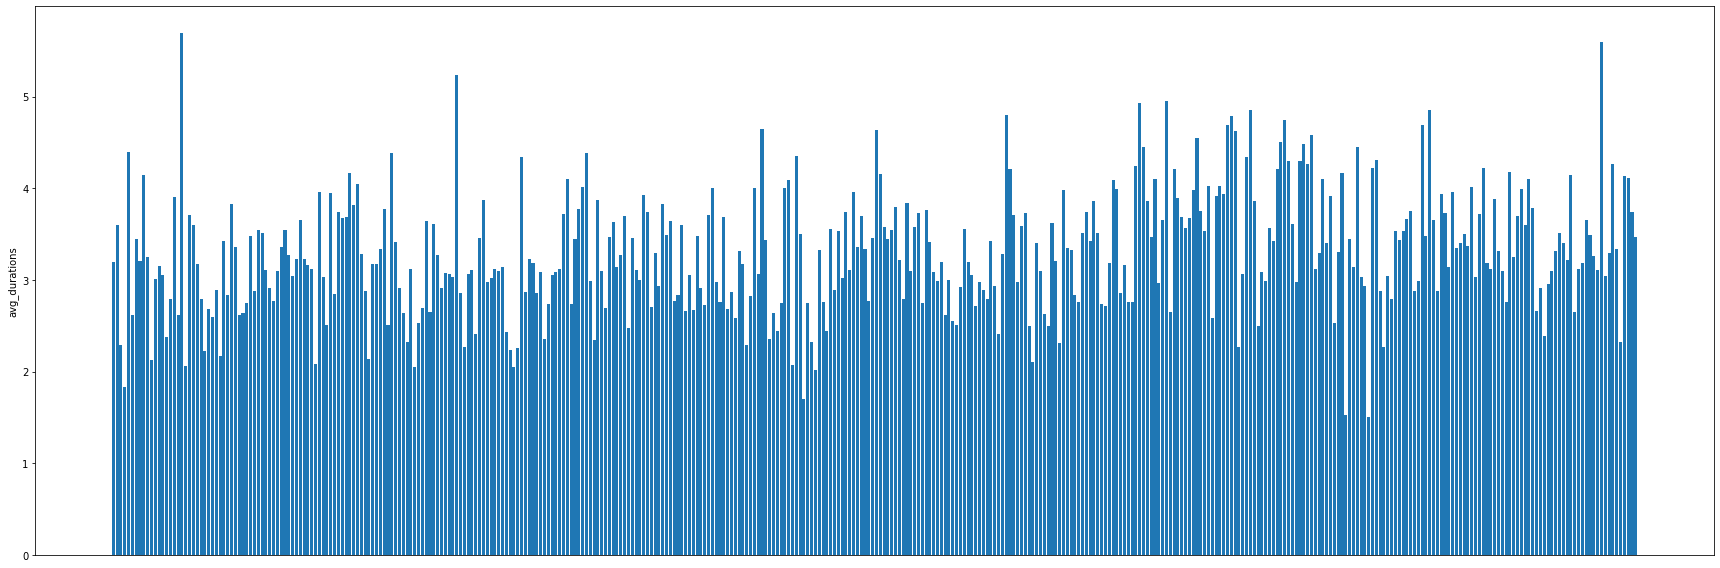

In [378]:
# mat do thoi gian / 1 audio tren moi nguoi
import numpy as np
no_of_files = np.array(no_of_files)
durations = np.array(durations)
avg_durations = np.divide(durations, no_of_files)
plt.figure(figsize=(24, 8))
plt.bar(filenames, avg_durations), plt.ylabel('avg_durations'), plt.xticks([]), plt.tight_layout()
plt.show()

In [374]:
avg_durations.mean(), np.argmax(avg_durations), sum(durations), max(avg_durations), min(avg_durations)

(3.3085621339285716,
 18,
 46319.86987500003,
 5.698844642857136,
 1.5033517857142857)

In [20]:
max_index = np.argmax(avg_durations)
filenames[max_index], durations[max_index], no_of_files[max_index]

('dataset/wavs_non_vad/504-F-25', 62.9223125, 1)

In [375]:
max_index = np.argmin(avg_durations)
filenames[max_index], durations[max_index], no_of_files[max_index]

('dataset/wavs/767-F-26', 52.617312500000004, 35)

In [376]:
# long files: greater than 1.5 times of average density of durations
avg_durations_bool = avg_durations > 1.5*avg_durations.mean()
# np.where(avg_durations_bool == True)
for idx in np.where(avg_durations_bool == True)[0].tolist():
    print(filenames[int(idx)], durations[int(idx)], no_of_files[idx], avg_durations[idx], )

dataset/wavs/44-M-28 199.45956249999975 35 5.698844642857136
dataset/wavs/504-F-25 183.21049999999985 35 5.23458571428571
dataset/wavs/90-F-50 195.6784374999998 35 5.590812499999994


Check the inequality of dataset and print out details, return number of files greater ans lower than threshold(35 files)

In [365]:
def check_inequality_data():
    '''to check the inequality of dataset from wavs folder
    '''
    root = Path("dataset/wavs")
    audio_folder_num = {}
    for audio_folder in root.iterdir():
        audio_folder_num[audio_folder.name] = len(os.listdir(audio_folder))
    mean_num = np.mean(list(audio_folder_num.values()))
    print("Total files:", sum(audio_folder_num.values()))
    print("mean number of audio files each folder", mean_num)
    print("min and max of number of files:", min(audio_folder_num.values()), max(audio_folder_num.values()))
    print(list(audio_folder_num.keys())[np.argmin(list(audio_folder_num.values()))])
    
    greater_than_mean = [k for k, v in audio_folder_num.items() if v > 1.1 * mean_num]
    lower_than_mean = [k for k, v in audio_folder_num.items() if v < 0.9 * mean_num]
    lower_than_thresh = [k for k, v in audio_folder_num.items() if v < 35]
    greater_than_thresh = [k for k, v in audio_folder_num.items() if v > 35]
    
    print('//===================================')
    # check for the total duration of each folder
    audio_folder_duration = {}
    for audio_folder in root.iterdir():
        audio_folder_duration[audio_folder.name] = sum([audio_file.stat().st_size for audio_file in audio_folder.iterdir()])
    mean_duration = np.mean(list(audio_folder_duration.values()))
    print("Total size:", sum(audio_folder_duration.values())/1e6, "MB")
    print("mean duration of audio files each folder", mean_duration/(1024*1024), "MB")
    print("min and max of duration:", min(audio_folder_duration.values())/(1024*1024), max(audio_folder_duration.values())/(1024*1024), "MB")
    
    greater_than_mean_duration = [k for k, v in audio_folder_duration.items() if v > 1.1 * mean_duration]
    lower_than_mean_duration = [k for k, v in audio_folder_duration.items() if v < 0.9 * mean_duration]

    print('//===================================')

    long_large = np.intersect1d(greater_than_mean, greater_than_mean_duration)
    short_small = np.intersect1d(lower_than_mean, lower_than_mean_duration)
    long_small = np.setxor1d(greater_than_mean, long_large)
    short_large = np.setxor1d(lower_than_mean, short_small)


    print("greater than mean in number of files:", len(greater_than_mean))
    print("lower than mean in number of files:", len(lower_than_mean))
    print("greater than mean in duration:", len(greater_than_mean_duration))
    print("lower than mean in duration:", len(lower_than_mean_duration))
    
    print('//===================================')

    print("long_large:", len(long_large))
    print("short_small:", len(short_small))
    print("long_small:", len(long_small))
    print("short_large:", len(short_large))


    with open("data_inequality.txt", 'w') as f:
        f.write("long_large: \n")
        for line in long_large:
            f.write(line + ' - ' + str(audio_folder_num[line]) +  ' - ' + str(audio_folder_duration[line])  + '\n')

        f.write("short_small: augment \n")
        for line in short_small:
            f.write(line + ' - ' + str(audio_folder_num[line]) +  ' - ' + str(audio_folder_duration[line])  + '\n')

        f.write("long_small: \n")
        for line in long_small:
            f.write(line + ' - ' + str(audio_folder_num[line]) +  ' - ' + str(audio_folder_duration[line])  + '\n')
  

        f.write("short_large: vad \n")
        for line in short_large:
            f.write(line + ' - ' + str(audio_folder_num[line]) +  ' - ' + str(audio_folder_duration[line])  + '\n')

        f.write("greater than thresh:  \n")
        for line in greater_than_thresh:
            f.write(line + ' - ' + str(audio_folder_num[line] - 35) + ' / ' +  str(audio_folder_num[line]) + '\n')
           
    
    return lower_than_thresh, greater_than_thresh
            
add, elim = check_inequality_data()

Total files: 14000
mean number of audio files each folder 35.0
min and max of number of files: 35 35
272-M-26
//===================================
Total size: 1483.434976 MB
mean duration of audio files each folder 3.5367845916748046 MB
min and max of duration: 1.609151840209961 6.088878631591797 MB
//===================================
greater than mean in number of files: 0
lower than mean in number of files: 0
greater than mean in duration: 119
lower than mean in duration: 122
//===================================
long_large: 0
short_small: 0
long_small: 0
short_large: 0


In [360]:
len(add), len(elim), elim

(0, 1, ['438-M-40'])

With folder have number of files less than threshold, copy augmented files randomly from aug_wavs dataset

In [229]:
import random
import shutil
from tqdm import tqdm

def add_augment_file(add, thresh=35):
    aug_root = 'dataset/aug_wavs'
    spk_root = 'dataset/wavs'
    for f in tqdm(add):
        gap = thresh - len(os.listdir(Path(spk_root, f))) 
        aug_files = glob.glob(f"{Path(aug_root, f)}/*.wav")
        choices = random.sample(aug_files, gap)
        for choice in choices:
            src = choice
            dst = choice.replace(str(Path(aug_root, f)), str(Path(spk_root, f)))
#             print(src, '->', dst)
            shutil.copy(src, dst)
    print('DONE')

add_augment_file(add)



  0%|          | 0/340 [00:00<?, ?it/s]

 10%|█         | 34/340 [00:00<00:00, 337.41it/s]

 19%|█▉        | 66/340 [00:00<00:00, 330.74it/s]

 31%|███       | 104/340 [00:00<00:00, 343.19it/s]

 42%|████▏     | 143/340 [00:00<00:00, 355.66it/s]

 55%|█████▌    | 187/340 [00:00<00:00, 375.84it/s]

 65%|██████▍   | 220/340 [00:00<00:00, 355.15it/s]

 74%|███████▍  | 253/340 [00:00<00:00, 294.91it/s]

 83%|████████▎ | 282/340 [00:00<00:00, 221.81it/s]

 90%|█████████ | 307/340 [00:01<00:00, 207.07it/s]

100%|██████████| 340/340 [00:01<00:00, 270.66it/s]

DONE
